In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
import openpyxl as xl
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_rows', 500)
#Utilizando Docker splash

# Parte 01: Web Scraping dos produtos, comentários e classificações.

In [ ]:
def get_soup(url):
    r = requests.get("http://localhost:8050/render.html", params = {"url": url, "wait": 2})
    soup = BeautifulSoup(r.text, "html.parser")
    return soup

In [ ]:
url_products = {
"https://www.amazon.com.br/Yellow-Cab-Graphic-Novel-%C3%9Anico/product-reviews/6589912572/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Shamisen-Can%C3%A7%C3%B5es-Mundo-Flutuante-Graphic/product-reviews/6586672554/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Cinco-por-Infinito-Exclusivo-Amazon/product-reviews/8593695159/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/As-Cr%C3%B4nicas-Era-Gelo-Mang%C3%A1/product-reviews/6586672619/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Trilogia-Gatilho-%C3%9Anico-Carlos-Estefan/product-reviews/6586672481/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Cr%C3%B4nicas-Era-Gelo-Mang%C3%A1-Vol/product-reviews/6586672597/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Desonra-Kubidai-Hikiukenin-Exclusivo-Amazon/product-reviews/8593695329/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Incal-1-S%C3%A9rie-Todo/product-reviews/6586672333/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/%C3%9Altimo-Voo-das-Borboletas/product-reviews/8593695361/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Peda%C3%A7o-Madeira-A%C3%A7o-Christophe-Chabout%C3%A9-ebook/product-reviews/B07D3F7WLM/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Grande-Livro-dos-Vampiros/product-reviews/6589912610/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Copra-Round-Dois-Michel-Fiffe/product-reviews/6586672589/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Moby-Dick-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695027/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Recado-Adolf-Vol-1-2/product-reviews/6586672228/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Copra-Round-Um-Michel-Fiffe/product-reviews/6586672562/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Henri-D%C3%A9sir%C3%A9-Landru-Serial-Killer/product-reviews/6586672147/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Tra%C3%A7o-Giz-Miguelanxo-Prado/product-reviews/6586672295/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Grande-Odalisca-2-Olympia/product-reviews/8593695388/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Drag%C3%A3o-Negro-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695191/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Fredric-William-Amazona-Persegui%C3%A7%C3%A3o-Quadrinhos/product-reviews/6586672635/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Grande-Odalisca-Exclusivo-Amazon/product-reviews/859369537X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Funny-Creek-Rafael-Scavone/product-reviews/6586672252/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Tomie-1-2-Junji-Ito/product-reviews/6586672376/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Satsuma-Gishiden-Cr%C3%B4nicas-Leais-Guerreiros/product-reviews/6586672090/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Masters-For%C3%A7a-Espacial-Jack-Kirby/product-reviews/6586672074/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Ningu%C3%A9m-%C3%9Anico-Jeff-Lemire/product-reviews/8593695272/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Rei-Macaco-Silverio-Pisu/product-reviews/6586672201/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conan-B%C3%A1rbaro-Livro-Robert-Howard-ebook/product-reviews/B07GX9YR93/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Jane-Exclusivo-Aline-Brosh-Mckenna/product-reviews/8593695302/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Floresta-Das-%C3%81rvores-Retorcidas/product-reviews/8593695345/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Blood-Uma-Hist%C3%B3ria-Sangue-Exclusivo/product-reviews/8593695124/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Sob-Solo-Bianca-Pinheiro/product-reviews/8593695418/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Maxwell-Gato-M%C3%A1gico-Alan-Moore/product-reviews/8593695612/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conto-Areia-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695086/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Espadas-Bruxas-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695000/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Arte-Charlie-Chan-Hock-Chye/product-reviews/8593695353/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Fronteiras-do-Al%C3%A9m-Jayme-Cortez/product-reviews/6586672023/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Por-Deus-ou-Pelo-Acaso/product-reviews/6586672031/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Brand-Outros-Cl%C3%A1ssicos-Frank-Frazetta/product-reviews/6586672503/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Luz-que-Fenece-Barbara-Baldi/product-reviews/8593695337/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Beowulf-Exclusivo-Amazon-Santiago-Garc%C3%ADa/product-reviews/8593695175/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Satsuma-Gishiden-Cr%C3%B4nicas-Leais-Guerreiros-ebook/product-reviews/B08YRR3MGZ/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Beasts-Burden-Rituais-Animais-Exclusivo/product-reviews/8593695035/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/M%C3%A1skara-%C3%9Anico-John-Arcudi/product-reviews/8593695590/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Hokusai-Biografia-em-Mang%C3%A1-%C3%9Anico/product-reviews/6586672406/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Mang%C3%A1-Document%C3%A1rio-Virgem-Depois-exclusivo-Amazon/product-reviews/8593695221/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Recado-Adolf-Vol-2/product-reviews/6586672244/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Tomie-Vol-2-Junji-Ito/product-reviews/6586672384/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Guardi%C3%B5es-Louvre-Mang%C3%A1-Exclusivo-Amazon/product-reviews/8593695094/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Anel-Nibelungo-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695140/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Relat%C3%B3rio-Brodeck-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695183/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Grama-Keum-Suk-Gendry-Kim/product-reviews/658667204X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Druuna-Vol-2-Exclusivo-Amazon/product-reviews/8593695248/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Marada-Mulher-Lobo-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695078/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conan-B%C3%A1rbaro-Livro-Exclusivo-Amazon/product-reviews/8593695051/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Sonja-Balada-Deusa-Sombra-Abutre/product-reviews/6586672465/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conan-B%C3%A1rbaro-Livro-exclusivo-Amazon/product-reviews/8593695310/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Solit%C3%A1rio-Exclusivo-Amazon-Christophe-Chabout%C3%A9/product-reviews/8593695280/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Os-Mitos-Cthulhu-Exclusivo-Amazon/product-reviews/8593695264/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Um-Pequeno-Assassinato-Exclusivo-Amazon/product-reviews/8593695043/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Cannon-Exclusivo-Amazon-Wallace-Wood/product-reviews/8593695019/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Tartarugas-Ninja-Cole%C3%A7%C3%A3o-Cl%C3%A1ssica-Vol/product-reviews/658667252X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Tartarugas-Ninja-Cole%C3%A7%C3%A3o-Cl%C3%A1ssica-Vol/product-reviews/8593695671/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Gastaria-Tudo-Pizza-Pedro-Duarte-ebook/product-reviews/B08GQFNSQW/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Beasts-Burden-Guardi%C3%B5es-Vizinhan%C3%A7a-Dorkin/product-reviews/8593695574/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Bran-Mak-Morn-%C3%9Altimo-Pictos/product-reviews/6586672449/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Roseira-Medalha-Engenho-Outras-Hist%C3%B3rias/product-reviews/8593695434/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Destino-Adiado-Jean-pierre-Gibrat/product-reviews/8593695582/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Ogiva-Graphic-Novel-Bruno-Zago/product-reviews/6586672112/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Profecia-David-Seltzer/product-reviews/8593695655/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conan-B%C3%A1rbaro-Livro-exclusivo-Amazon/product-reviews/8593695310/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Druuna-Vol-Caixa-Cole%C3%A7%C3%A3o-Exclusivo/product-reviews/8593695256/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Druuna-Vol-1-Exclusivo-Amazon/product-reviews/859369523X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Rohan-No-Louvre-Exclusivo-Amazon/product-reviews/859369554X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Os-Mitos-Cthulhu-Exclusivo-Amazon/product-reviews/8593695264/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Lone-Sloane-%C3%9Anico-Exclusivo-Amazon/product-reviews/8593695205/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Uma-Dobra-Tempo-Madeleine-LEngle/product-reviews/8594541023/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Corvo-Edi%C3%A7%C3%A3o-Definitiva-James-Obarr/product-reviews/859454118X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Imagin%C3%A1rio-Coletivo-Wesley-Rodrigues/product-reviews/8594541309/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Refugiados-%C3%9Altima-Fronteira-Kate-Evans/product-reviews/8594541295/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Shir%C3%B4-Danilo-Beyruth/product-reviews/8594541392/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Neurocomic-Caverna-das-Mem%C3%B3rias-Hana/product-reviews/8594541074/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Meu-Amigo-Dahmer-Derf-Backderf/product-reviews/8594540353/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Floresta-dos-medos-Emily-Carroll/product-reviews/8594541406/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Aurora-Sombras-Fabien-Vehlmann-Kerasco%C3%ABt/product-reviews/8594541643/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Exorcismo-Ritual-Romano-El-Torres/product-reviews/8594541678/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/30-Dias-Noite-Edi%C3%A7%C3%A3o-Comemorativa/product-reviews/8594541260/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Silvestre-Wagner-Willian/product-reviews/8594541910/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Vida-Gato-Serge-Baeken/product-reviews/8594542178/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Separados-Scott-Snyder/product-reviews/6555980117/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Menina-Outro-lado-Vol/product-reviews/8594541740/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Menina-Outro-Lado-Nagabe/product-reviews/8594541732/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Menina-Outro-lado-Vol/product-reviews/8594541619/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Menina-do-Outro-Lado/product-reviews/8594541554/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Pr%C3%ADncipe-Costureira-Jen-Wang/product-reviews/6555980109/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Fragmentos-do-Horror-Junji-Ito/product-reviews/8594540361/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Um-Lugar-Bem-Longe-Daqui/product-reviews/8551004867/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Pai-rico-pai-pobre-anos/product-reviews/8550801488/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Labirinto-Fauno-Guillermo-Del-Toro/product-reviews/8551005197/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/morro-dos-ventos-uivantes/product-reviews/8594318235/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Que-Aconteceu-Com-Annie/product-reviews/8551004751/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
"https://www.amazon.com.br/Homem-Giz-C-J-Tudor/product-reviews/8551002937/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Conto-Aia-Margaret-Atwood/product-reviews/8532520669/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Sutil-Arte-Ligar-Se/product-reviews/855100249X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=",
"https://www.amazon.com.br/Garota-do-Lago-Charlie-Donlea/product-reviews/856240988X/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber="
}


In [ ]:
url_products = list(url_products)
print(len(url_products))

28


In [ ]:

def get_reviews(soup):
    reviews = soup.find_all("div", {"data-hook": "review"})
    try:
        for item in reviews:
            review = {
            "Product": soup.title.text.replace("Amazon.com.br:Avaliação de clientes: ", "").strip(),
            "rate" : float(item.find("span",{"class": "a-icon-alt"} ).text.replace(" de 5 estrelas","").replace(",",".").strip()),
            "title" : item.find("a",{"data-hook": "review-title"} ).text.strip(),
            "review_body": item.find("span", {"data-hook": "review-body"}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [ ]:
reviewlist = []
n = 0
while n < len(url_products):
    for x in range(1,35):
        soup = get_soup(f"{url_products[n]}{x}")
        print(f"geting page: {x}")
        get_reviews(soup)
        print(len(reviewlist))
        if not soup.find("li", {"class": "a-disabled a-last"}):
            pass
        else:
            break
    n = n+1

geting page: 1
10
geting page: 2
20
geting page: 3
28
geting page: 1
38
geting page: 2
48
geting page: 3
58
geting page: 4
64
geting page: 1
74
geting page: 2
84
geting page: 3
94
geting page: 4
104
geting page: 5
114
geting page: 6
124
geting page: 7
134
geting page: 8
144
geting page: 9
154
geting page: 10
164
geting page: 11
174
geting page: 12
184
geting page: 13
194
geting page: 14
204
geting page: 15
214
geting page: 16
224
geting page: 17
234
geting page: 18
244
geting page: 19
254
geting page: 20
264
geting page: 21
274
geting page: 22
284
geting page: 23
294
geting page: 24
304
geting page: 25
314
geting page: 26
324
geting page: 27
334
geting page: 28
344
geting page: 29
354
geting page: 30
364
geting page: 31
374
geting page: 32
384
geting page: 33
394
geting page: 34
404
geting page: 1
414
geting page: 2
424
geting page: 3
434
geting page: 4
444
geting page: 5
454
geting page: 6
464
geting page: 7
474
geting page: 8
484
geting page: 1
494
geting page: 2
504
geting page: 3
5

geting page: 20
3960
geting page: 21
3970
geting page: 22
3980
geting page: 23
3990
geting page: 24
4000
geting page: 25
4010
geting page: 26
4020
geting page: 27
4030
geting page: 28
4040
geting page: 29
4050
geting page: 30
4060
geting page: 31
4070
geting page: 32
4080
geting page: 33
4090
geting page: 34
4100
geting page: 1
4110
geting page: 2
4120
geting page: 3
4130
geting page: 4
4140
geting page: 5
4150
geting page: 6
4160
geting page: 7
4170
geting page: 8
4180
geting page: 9
4190
geting page: 10
4200
geting page: 11
4210
geting page: 12
4220
geting page: 13
4230
geting page: 14
4240
geting page: 15
4250
geting page: 16
4260
geting page: 17
4270
geting page: 18
4280
geting page: 19
4290
geting page: 20
4300
geting page: 21
4310
geting page: 22
4320
geting page: 23
4330
geting page: 24
4340
geting page: 25
4350
geting page: 26
4360
geting page: 27
4370
geting page: 28
4380
geting page: 29
4390
geting page: 30
4400
geting page: 31
4410
geting page: 32
4420
geting page: 33
4430
g

In [ ]:
df = pd.DataFrame(reviewlist)

In [ ]:
df.to_excel("Amazon_Reviews.xlsx", index = False)

In [ ]:
df.to_csv("Amazon_Reviews.csv", index = False)

In [ ]:
df.head()

,Product,rate,title,review_body
0,A Grande Odalisca (volume Exclusivo Amazon),3.0,Sessão da tarde 16+,Parabenizo o trio de editores pela tentativa d...
1,A Grande Odalisca (volume Exclusivo Amazon),3.0,Mais ou menos,"Boa história, linda arte. Mas muito curta e mu..."
2,A Grande Odalisca (volume Exclusivo Amazon),5.0,Uma preciosidade no catálogo do PN,Quadrinhos franco-belgas são sempre considerad...
3,A Grande Odalisca (volume Exclusivo Amazon),5.0,Uns 90 minutos muito bem aproveitados.,"Uma leitura rápida, interessante e bastante di..."
4,A Grande Odalisca (volume Exclusivo Amazon),5.0,Ótimo quadrinho francês,O lançamento do PN de outubro é esse quadrinho...


In [ ]:
print(f"O DataFrame possui: {df.shape[0]} linhas e {df.shape[1]} colunas")

O DataFrame possui: 15548 linhas e 4 colunas


In [ ]:
df["review_body"][0]

'Parabenizo o trio de editores pela tentativa de trazer quadrinhos fora do mainstream.A história prende, mas não surpreendente.Arte acima da média com cenas de ação bem desenvolvidas, assim como um roteiro bem amarrado.Minha avaliação não foi maior pelo custo benefício. A editora prima de mais pelo acabamento e encarece um produto, que na minha opinião, poderia vir sem tanto luxo e mais acessível.'

In [ ]:
df = pd.read_csv("Amazon_Reviews.csv")

In [ ]:
df.shape

(15548, 4)

In [ ]:
df.head()

,Product,rate,title,review_body
0,A Grande Odalisca (volume Exclusivo Amazon),3,Sessão da tarde 16+,Parabenizo o trio de editores pela tentativa d...
1,A Grande Odalisca (volume Exclusivo Amazon),3,Mais ou menos,"Boa história, linda arte. Mas muito curta e mu..."
2,A Grande Odalisca (volume Exclusivo Amazon),5,Uma preciosidade no catálogo do PN,Quadrinhos franco-belgas são sempre considerad...
3,A Grande Odalisca (volume Exclusivo Amazon),5,Uns 90 minutos muito bem aproveitados.,"Uma leitura rápida, interessante e bastante di..."
4,A Grande Odalisca (volume Exclusivo Amazon),5,Ótimo quadrinho francês,O lançamento do PN de outubro é esse quadrinho...


In [ ]:
df.sample(10)

,Product,rate,title,review_body
11721,"Shirô: Yakuza, honra e sangue no coração de Sã...",5,Agradecimentos,Não tenho nada a reclamar...aliás recomendo A...
1313,Mangá-Documentário: Virgem Depois dos 30 (excl...,5,Parabens!!!,Esse mangá deveria já ter sido lançado no Bras...
12147,A garota do lago,2,Investigação é inexistente! (Sem Spoiler),"Tudo no livro desenrola de forma muito, mais m..."
4232,Um Pequeno Assassinato - Volume Único Exclusiv...,3,bom,acho que a ideia dele é mais interessante do q...
868,Beasts of Burden. Rituais Animais - Volume 1 E...,5,A melhor HQ sobrenatural do ano.,"Beasts of Burden é um ótimo quadrinho, tem um ..."
1573,O Último Voo das Borboletas,5,Um dos melhores mangás que já li!,Ao adquirir não esperava muito desse mangá alé...
4680,O Máskara - Volume Único,5,Nostalgia e diversão,Fiquei sabendo que o Máskara era um quadrinho ...
11019,O Preço da Desonra. Kubidai Hikiukenin (Exclus...,5,Uma folheada arte e acabamento saltam da folha,Uma obra sendo bem respeitada ao ser lançada e...
9840,Um Pedaço de Madeira e Aço,1,não compensa,sem nenhuma graça
10891,O Preço da Desonra. Kubidai Hikiukenin (Exclus...,5,Gekigá de valor,Ao melhor estilo lobo solitárioz esse quadrinh...


In [ ]:
f"O DF tem {df.shape[0]} linhas e {df.shape[1]} colunas"


'O DF tem 15548 linhas e 4 colunas'

In [ ]:
df.to_csv("Amazon_Reviews.csv", index = False)
df.to_excel("Amazon_Reviews.xlsx", index = False)

In [ ]:
df.loc[df['review_body'] == "Sensação visualmente insano"]

,Product,rate,title,review_body
7982,Incal (Volume 1 da Série Todo Incal),5.0,Mais um petardo do pipoca e nanquim,Sensação visualmente insano


In [ ]:
df["review_body"] = df["review_body"].values.astype(str)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11108 entries, 0 to 11107
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Product      11108 non-null  object 
 1   rate         11108 non-null  float64
 2   title        11108 non-null  object 
 3   review_body  11108 non-null  object 
dtypes: float64(1), object(3)
memory usage: 347.2+ KB


In [ ]:
df["rate"] = df["rate"].astype(float)
df["review_body"] = df["review_body"].astype(str)
df["Product"] = df["Product"].astype(str)
df["title"] = df["title"].astype(str)

# Parte 3 : Modelo de Machine Learning Análise de sentimentos

## 3.1 - Preparação dos dados


In [ ]:
class Sentiment:
    NEGATIVO = "NEGATIVO"
    POSITIVO = "POSITIVO"

class Review:
    def __init__(self, text, rate):
        self.text = text
        self.rate = rate
        self.sentiment = self.get_sentiment()
        
    def get_sentiment(self):
        if self.rate <= 3:
            return Sentiment.NEGATIVO
        else:# 4 or 5 rate
            return Sentiment.POSITIVO

In [ ]:
reviews = []
n = 0
for line in df.iterrows():
    reviews.append(Review(df["review_body"][n],df["rate"][n]))
    n = n+1


In [ ]:
reviews[9120].rate

3.0

In [ ]:
df["rate"].value_counts()

5.0    12064
4.0     1682
3.0      968
2.0      428
1.0      406
Name: rate, dtype: int64

## 3.2 - Criando DF teste e DF treino

In [ ]:
from sklearn.model_selection import train_test_split as tts

In [ ]:
training,test = tts(reviews,test_size = 0.33, random_state = 777)

In [ ]:
train_x = [x.text for x in training]
train_y = [y.sentiment for y in training]

test_x = [x.text for x in test]
test_y = [y.sentiment for y in test]

a = 50
f'O comentário "{train_x[a]}" é {train_y[a]}'

'O comentário ".Tudo nessa obra é bonito. Com uma qualidade gráfica e de acabamento incrível para os patrões brasileiros essa obra do Jiro Taniguchi é mas que uma declaração de amor ao museu do Louvre, nessa obra o autor faz uma declaração de amor a historia da arte. Guardiões do Louvre é uma obra que deve ser exaltada pela sua originalidade e beleza." é POSITIVO'

## 3.3 - Vetorização de palavras (Bag of Words)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn.feature_extraction.text import TfidfVectorizer as tfid

In [ ]:
vectorizer = cv()
train_x_vector = vectorizer.fit_transform(train_x)
test_x_vector = vectorizer.transform(test_x)


## 3.4 - 1º Classificação

### 3.4.1 - Linear SVM

In [ ]:
from sklearn import svm

In [ ]:
classif_svm = svm.SVC(kernel = "linear")

classif_svm.fit(train_x_vector,train_y)

SVC(kernel='linear')

In [ ]:
print(test_x[15])
print(test_x_vector[11])

O livro chegou antes do prazo como sempre uma entrega agilizada por parte da Amazon porem livro chegou danificado creio que a entregadora não tenha culpa pois nao havia nenhum dano na embalagem externa, ao abrir o plástico do livro vi a danificação nas páginas, poxa o livro em si é uma grande aquisição por conta da sua estética se comparando até a livros da Darkside, tal defeito deestetico realmente deixa a pessoa decepcionada.
  (0, 3331)	1
  (0, 3706)	1
  (0, 3993)	1
  (0, 4345)	1
  (0, 4431)	2
  (0, 6508)	1
  (0, 7651)	1
  (0, 7727)	1
  (0, 10005)	1
  (0, 11472)	1
  (0, 11482)	2
  (0, 12243)	1
  (0, 12963)	1
  (0, 13426)	1
  (0, 13492)	2
  (0, 14101)	2
  (0, 14816)	1
  (0, 15152)	1
  (0, 15357)	1
  (0, 17209)	1
  (0, 17383)	1
  (0, 17823)	1
  (0, 17844)	1
  (0, 18000)	1
  (0, 18615)	1
  (0, 19381)	1
  (0, 19586)	1
  (0, 19698)	1
  (0, 19720)	1
  (0, 20106)	1
  (0, 20257)	1
  (0, 20590)	1
  (0, 20676)	1
  (0, 20759)	1
  (0, 20872)	1
  (0, 21600)	1
  (0, 21667)	1
  (0, 21753)	1
  (0, 

In [ ]:
classif_svm.predict(test_x_vector[15])

array(['NEGATIVO'], dtype='<U8')

### 3.4.2 - Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier as dtc

In [ ]:
classif_dect = dtc()
classif_dect.fit(train_x_vector, train_y)

DecisionTreeClassifier()

In [ ]:
classif_dect.predict(test_x_vector[15])

array(['NEGATIVO'], dtype='<U8')

### 3.4.3 - Linear Regression

In [ ]:
from sklearn.linear_model import LogisticRegression as lr

In [ ]:
classif_lr = lr()
classif_lr.fit(train_x_vector, train_y)

C:\Users\PROGRAMAÇÃO\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
classif_lr.predict(test_x_vector[15])

array(['NEGATIVO'], dtype='<U8')

## 3.5 - 1º Validação

In [ ]:
from sklearn.metrics import f1_score

### 3.5.1 - Linear SVM

In [ ]:
#Score (Mean Accuracy)
classif_svm.score(test_x_vector, test_y)

0.912102903917365

In [ ]:
#F1 Score
f1_score(test_y, classif_svm.predict(test_x_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.95098359, 0.57492931])

### 3.5.2 - Decision Tree

In [ ]:
#Score (Mean Accuracy)
classif_dect.score(test_x_vector, test_y)

0.8778015981290197

In [ ]:
#F1 Score
f1_score(test_y, classif_dect.predict(test_x_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.93166213, 0.42318307])

### 3.5.3 - Linear Regression

In [ ]:
#Score (Mean Accuracy)
classif_lr.score(test_x_vector, test_y)

0.9206782303644514

In [ ]:
#F1 Score
f1_score(test_y, classif_lr.predict(test_x_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.95614697, 0.58511723])

## 3.6 - Reorganização dos dados

In [ ]:
import random

In [ ]:
print(f' DF de treino {train_y.count(Sentiment.POSITIVO)} sentimentos positivos e {train_y.count(Sentiment.NEGATIVO)} negativos')

 DF de treino 9185 sentimentos positivos e 1232 negativos


In [ ]:
negativos = list(filter(lambda x: x.sentiment == Sentiment.NEGATIVO, reviews))
positivos = list(filter(lambda x: x.sentiment == Sentiment.POSITIVO, reviews))

In [ ]:
print(len(negativos))
print(len(positivos))

1802
13746


In [ ]:
positivos_reduc = positivos[:len(negativos)]

In [ ]:
reviews_distribuidos_igualmente = negativos + positivos_reduc

In [ ]:
random.shuffle(reviews_distribuidos_igualmente)

In [ ]:
len(reviews_distribuidos_igualmente)

3604

## 3.7 - DF teste e DF treino

In [ ]:
training_2,test_2 = tts(reviews_distribuidos_igualmente,test_size = 0.25, random_state = 777)

In [ ]:
train_x_2= [x.text for x in training_2]
train_y_2 = [y.sentiment for y in training_2]

test_x_2 = [x.text for x in test_2]
test_y_2 = [y.sentiment for y in test_2]

a = 50
print(f'O comentário "{train_x_2[a]}" é {train_y_2[a]}')
print()
print(f'Tamanho de x treino 2: {len(train_x_2)}')
print()
print(f'Tamanho de x teste 2: {len(test_x_2)}')

O comentário "Eu li mas esperei muito mais. A arte é algo absurdamente estranho..quase um abstrato com modernismo e sei la mais oque..enfim.. tem altos e baixos. Mas ñ foi uma hq boa nem em 1000 anos. Talvez um livro ficaria melhor." é NEGATIVO

Tamanho de x treino 2: 2703

Tamanho de x teste 2: 901


## 3.8 - Vetorização dos dados 2

In [ ]:
vectorizer = tfid()
train_x_2_vector = vectorizer.fit_transform(train_x_2)
test_x_2_vector = vectorizer.transform(test_x_2)


## 3.9 -  2º Classificação 

### 3.9.1 - Linear Regression

In [ ]:
classif_svm = svm.SVC(kernel = "linear")

classif_svm.fit(train_x_2_vector,train_y_2)

SVC(kernel='linear')

### 3.9.2 - Decision Tree

In [ ]:
classif_dect.fit(train_x_2_vector, train_y_2)

DecisionTreeClassifier()

### 3.9.3 - Linear Regression

In [ ]:
classif_lr.fit(train_x_2_vector, train_y_2)

LogisticRegression()

## 3.10 - 2º Validação

### 3.10.1 - Linear SVM

In [ ]:
#Score (Mean Accuracy)
classif_svm.score(test_x_2_vector, test_y_2)

0.8790233074361821

In [ ]:
#F1 Score
f1_score(test_y_2, classif_svm.predict(test_x_2_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.88061336, 0.87739033])

### 3.10.2 - Decision Tree

In [ ]:
#Score (Mean Accuracy)
classif_dect.score(test_x_2_vector, test_y_2)

0.7658157602663707

In [ ]:
#F1 Score
f1_score(test_y_2, classif_dect.predict(test_x_2_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.77090119, 0.76049943])

### 3.10.3 - Linear Regression

In [ ]:
#Score (Mean Accuracy)
classif_lr.score(test_x_2_vector, test_y_2)

0.8690344062153164

In [ ]:
#F1 Score
f1_score(test_y_2, classif_lr.predict(test_x_2_vector), average = None, labels = [Sentiment.POSITIVO,Sentiment.NEGATIVO])

array([0.87145969, 0.86651584])

In [ ]:
test_set = ["que coisa horrivel", #negativo
            "péssimo,odiei", #negativo
            "é bom mas nao vale o preço", #negativo
            "um dos melhores que ja li", #positivo
            "qualidade define",#positivo
            "muito caro pelo que é",#negativo
            "poderia ser melhor pelo preço",#negativo
            "nunca tive a oportunidade de ler alguma coisa assim. Simplesmente incrìvel. Mais um trabalho primoroso do pipoca e nanquim",#positivo,
            "ótima história mas péssimo acabamento",#negativo
            "dinheiro jogado no lixo",#negativo
            "horrivel",#negativo
            "não gostei nem um pouco",#negativo
            "é bom mas pode melhorar",#negativo
            "péssimo, extremo mau gosto",#negativo
            "extremamente superestimado",#negativo
            "muito bom adorei cada segundo",#positivo
            "extretamente bom, um grande acerto",#positivo
            "uma verdadeira obra de arte",#positivo
            "precisa melhorar muito ainda",#"negativo"
            "amei, lindo, maravilhoso. Valeu cada centavo"#positivo
           
           
           
           
           
           
           
           
           ]
test_set_vec = vectorizer.transform(test_set)

print(classif_svm.predict(test_set_vec))

['NEGATIVO' 'NEGATIVO' 'NEGATIVO' 'POSITIVO' 'POSITIVO' 'NEGATIVO'
 'NEGATIVO' 'POSITIVO' 'NEGATIVO' 'NEGATIVO' 'POSITIVO' 'NEGATIVO'
 'NEGATIVO' 'NEGATIVO' 'POSITIVO' 'POSITIVO' 'POSITIVO' 'POSITIVO'
 'POSITIVO' 'POSITIVO']


In [ ]:
print(f'total: {len(test_set)}')
print("acertos: 17")
print(f'{(17/20)*100}%')

total: 20
acertos: 17
85.0%


## 4 - Salvando o modelo

### 4.1 - salvando o modelo

In [ ]:
import pickle

with open('F:\ESTUDOS\DATA_SCIENCE\ML - SENTIMENTAL ANALYSIS - 02\sentiment_classifier.pkl', "wb") as f:
    pickle.dump(classif_lr, f)

### 4.2 carregando o modelo

In [ ]:
with open('F:\ESTUDOS\DATA_SCIENCE\ML - SENTIMENTAL ANALYSIS - 02\sentiment_classifier.pkl', "rb") as f:
    classif_carregado = pickle.load(f)

In [ ]:
classif_carregado.predict(test_set_vec)

array(['NEGATIVO', 'POSITIVO', 'NEGATIVO', 'POSITIVO', 'POSITIVO',
       'NEGATIVO', 'NEGATIVO', 'POSITIVO', 'NEGATIVO', 'NEGATIVO',
       'POSITIVO', 'NEGATIVO', 'NEGATIVO', 'NEGATIVO', 'POSITIVO',
       'POSITIVO', 'POSITIVO', 'POSITIVO', 'POSITIVO', 'POSITIVO'],
      dtype='<U8')

## 5 - Matriz de Confusão

In [ ]:
import seaborn as sn
import matplotlib.pyplot as mt
from sklearn.metrics import confusion_matrix

In [ ]:
y_pred = classif_carregado.predict(test_x_2_vector)

In [ ]:
labels = [Sentiment.POSITIVO, Sentiment.NEGATIVO]

<AxesSubplot:>

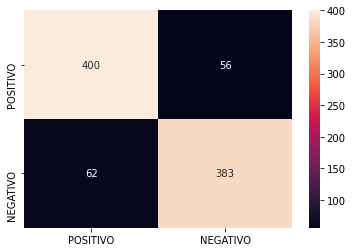

In [ ]:
cm = confusion_matrix(test_y_2, y_pred, labels = labels)
df_cm = pd.DataFrame(cm, index=labels, columns = labels)
sn.heatmap(df_cm, annot=True, fmt = "")